In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

print(f"TensorFlow Version : {tf.__version__}")
print(f"GPU Available : {tf.test.is_gpu_available()}")
device_name = tf.config.list_physical_devices()
print("Device(s) : {}".format(*device_name), end="\n\n")

print(f"Numpy Version : {np.__version__}")
print(f"Pandas Version : {pd.__version__}")

TensorFlow Version : 2.8.0
GPU Available : False
Device(s) : PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')

Numpy Version : 1.21.6
Pandas Version : 1.3.5


In [4]:
from pathlib import Path
DATASET_PATH = Path.cwd().parent / "cleaned_data.csv"
print(f"dataset path : {DATASET_PATH}")

def shuffle(df, n_iter=10):
    df = df.copy()
    for _ in range(n_iter):
        df = df.sample(frac=1)

    return df.reset_index(drop=True)

cols = ['Name', 'style', 'Exterior_color', 'interior_color', 'Engine',
       'drive_type', 'Fuel_Type', 'Transmission', 'Mileage', 'mpg_city',
       'mpg_highway', 'price', 'Year', 'Engine_V', 'Brand']

cars = pd.read_csv(DATASET_PATH, names=cols)
cars = shuffle(cars, n_iter=10)
print(f"datset shape : {cars.shape}")
cars.head(5)

datset shape : (6533, 15)


,Name,style,Exterior_color,interior_color,Engine,drive_type,Fuel_Type,Transmission,Mileage,mpg_city,mpg_highway,price,Year,Engine_V,Brand
0,Corolla,Sedan,Super White,Unknown,Inline-4 Gas,FWD,Gas,Automatic,20640,28,36,21990,2019,1.8,Toyota
1,Silverado,Pickup Truck,Black,Jet Black,V-8 Gas,4WD,Gas,Automatic,97308,15,20,37641,2018,5.3,Chevrolet
2,Fusion,Sedan,Tan,Unknown,Inline-4 Gas,FWD,Gas,Automatic,157471,22,34,8000,2015,2.5,Ford
3,Cherokee,SUV,Diamond Black Crystal Pearlcoat,Black,Inline-4 Gas,4WD,Gas,Automatic,44816,21,29,25496,2019,2.4,Jeep
4,Altima,Sedan,Super Black,Light Gray,Inline-4 Gas,FWD,Gas,Automatic,10448,28,39,19791,2019,2.5,Nissan


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6533 entries, 0 to 6532
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            6292 non-null   object
 1   style           6533 non-null   object
 2   Exterior_color  6533 non-null   object
 3   interior_color  6533 non-null   object
 4   Engine          6533 non-null   object
 5   drive_type      6533 non-null   object
 6   Fuel_Type       6533 non-null   object
 7   Transmission    6533 non-null   object
 8   Mileage         6533 non-null   object
 9   mpg_city        6533 non-null   object
 10  mpg_highway     6533 non-null   object
 11  price           6533 non-null   object
 12  Year            6533 non-null   object
 13  Engine_V        6533 non-null   object
 14  Brand           6533 non-null   object
dtypes: object(15)
memory usage: 765.7+ KB


In [6]:
cars = cars.dropna().reset_index(drop=True)
cars.shape

(6292, 15)

In [7]:
i = cars[cars.Mileage.str.isdigit() == False].index
print(f"none-numeric value available with index(s) : {i}")
cars.drop(i, axis=0, inplace=True)
print(f"dataet shape : {cars.shape}")

none-numeric value available with index(s) : Int64Index([1086], dtype='int64')
dataet shape : (6291, 15)


In [8]:
cars = cars.astype({"Mileage" : np.int32, "mpg_city" : np.int8, "mpg_highway" : np.int8,
                    "price" : np.int32, "Year" : np.int32, "Engine_V" : np.float32})

In [9]:
cars.describe(include="all")

,Name,style,Exterior_color,interior_color,Engine,drive_type,Fuel_Type,Transmission,Mileage,mpg_city,mpg_highway,price,Year,Engine_V,Brand
count,6291,6291,6291,6291,6291,6291,6291,6291,6291.000000,6291.000000,6291.000000,6291.000000,6291.000000,6291.000000,6291
unique,268,9,526,305,30,4,3,2,NaN,NaN,NaN,NaN,NaN,NaN,43
top,F-150,SUV,Black,Black,Inline-4 Gas,FWD,Gas,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,Ford
freq,1238,2084,447,2112,1682,2628,6236,6172,NaN,NaN,NaN,NaN,NaN,NaN,2017
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63799.074710,21.384677,28.478779,26076.222222,2017.224130,2.963847,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42846.042218,5.059630,6.257535,11087.348287,3.010157,1.187817,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.000000,10.000000,16.000000,2000.000000,1997.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32078.000000,18.000000,23.000000,17990.000000,2017.000000,2.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52443.000000,20.000000,27.000000,24999.000000,2018.000000,2.500000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86788.000000,25.000000,34.000000,33951.500000,2019.000000,3.600000,NaN


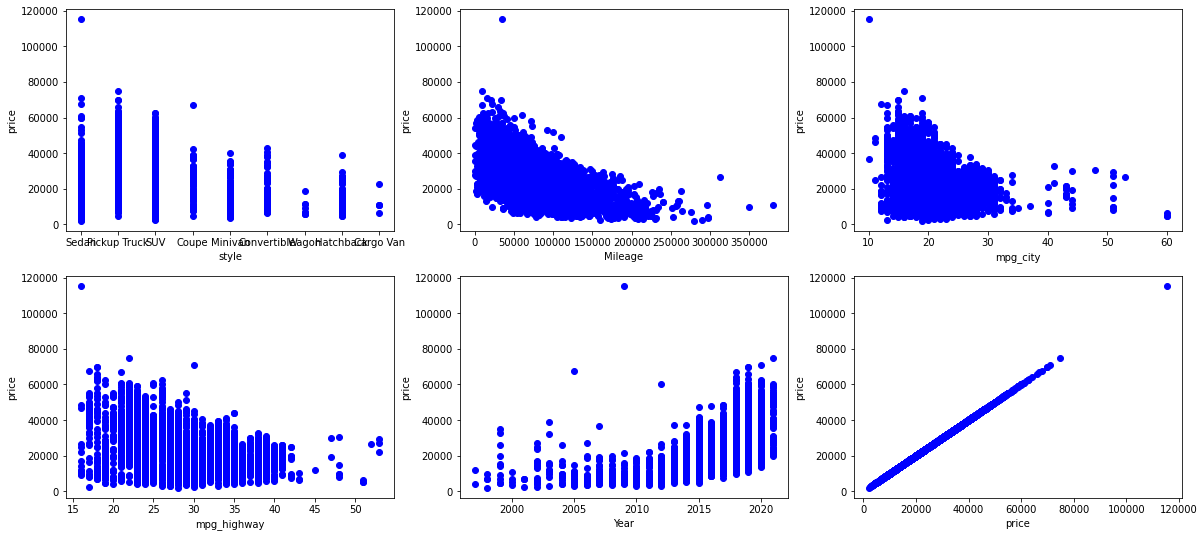

In [10]:
fig , axes = plt.subplots(nrows=2, ncols=3, figsize=(20,9))

target = cars["price"]
features = ['style', 'Mileage', 'mpg_city',
            'mpg_highway', 'Year', 'price']

axes = axes.flatten()
for i in range(6):
    feature = features[i]
    axes[i].plot(cars[feature], target, "bo")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("price")

plt.show()

In [11]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.20
train, test = train_test_split(cars, test_size=TEST_SIZE, random_state=42)
train, val = train_test_split(train, test_size=TEST_SIZE, random_state=42)

print(f"Training Dataset shape : {train.shape}")
print(f"Validation Dataset shape : {val.shape}")
print(f"Test Dataset shape : {test.shape}")

Training Dataset shape : (4025, 15)
Validation Dataset shape : (1007, 15)
Test Dataset shape : (1259, 15)


In [ ]:
TRAIN_SIZE = 0.80
number_of_samples = cars.shape[0]
number_of_training_samples = int(np.ceil(number_of_samples * TRAIN_SIZE))

df_train = cars.iloc[:number_of_training_samples , :]
df_eval  = cars.iloc[number_of_training_samples : , :]

print(f"Training Dataset shape : {df_train.shape}")
print(f"Testing Dataset shape : {df_eval.shape}")

Training Dataset shape : (5033, 15)
Testing Dataset shape : (1258, 15)


In [12]:
columns = cars.columns
columns

Index(['Name', 'style', 'Exterior_color', 'interior_color', 'Engine',
       'drive_type', 'Fuel_Type', 'Transmission', 'Mileage', 'mpg_city',
       'mpg_highway', 'price', 'Year', 'Engine_V', 'Brand'],
      dtype='object')

In [13]:
categorical_columns = ['Name', 'style', 'Exterior_color', 'interior_color', 'Engine',
                       'drive_type', 'Fuel_Type', 'Transmission', 'Brand']
numerical_columns = ['Mileage', 'mpg_city',
                     'mpg_highway', 'Year', 'Engine_V']

categorical_features = list()
for col_name in categorical_columns:
    vocabulary =  cars[col_name].unique()
    category = tf.feature_column.categorical_column_with_vocabulary_list(key=col_name,
                                                                         vocabulary_list=vocabulary,)
    indicator_column = tf.feature_column.indicator_column(category)  
    categorical_features.append(indicator_column)

numerical_features = list()
for col_name in numerical_columns:
    numerical_features.append(
        tf.feature_column.numeric_column(key=col_name, dtype=tf.float32))

feature_columns = categorical_features + numerical_features

print(f"Number of categorical features : {len(categorical_features)}")
print(f"Number of numerical features : {len(numerical_features)}")
print(f"Total number of columns : {len(feature_columns)}")

Number of categorical features : 9
Number of numerical features : 5
Total number of columns : 14


In [14]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    features, target = dataframe, dataframe.pop("price")

    dataset = tf.data.Dataset.from_tensor_slices(
        (dict(features), target)
    )
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(features))
    dataset = dataset.batch(batch_size=batch_size)
    return dataset

In [15]:
train_ds = df_to_dataset(train, shuffle=True, batch_size=32)
val_ds = df_to_dataset(val, shuffle=True, batch_size=10)
test_ds = df_to_dataset(test, shuffle=True, batch_size=10)

In [16]:
sample = train_ds.take(1)
for feature_batch, label_batch in sample:
    print(print('Every feature:', list(feature_batch.keys())))
    print('A batch of targets:', label_batch )

Every feature: ['Name', 'style', 'Exterior_color', 'interior_color', 'Engine', 'drive_type', 'Fuel_Type', 'Transmission', 'Mileage', 'mpg_city', 'mpg_highway', 'Year', 'Engine_V', 'Brand']
None
A batch of targets: tf.Tensor(
[17997 34500 18288 24943 10990 19000 27750 30000 11999 45991 27992 28925
 13995 17985 13000 35798 30000 19400 50990 34500  8500 33945 33999 40009
 54008 18991 27999 12900 32590 36450 17497 28200], shape=(32,), dtype=int32)


In [17]:
predictor = tf.keras.models.Sequential(
    [
        tf.keras.layers.DenseFeatures(feature_columns),
        tf.keras.layers.Normalization(),

        tf.keras.layers.Dense(
            64, activation="relu", use_bias=True,
            kernel_initializer="glorot_uniform", name="FC_1"
        ),

        tf.keras.layers.Dense(
            32, activation="relu", use_bias=True,
            kernel_initializer="glorot_uniform", name="FC_2"
        ),

        tf.keras.layers.Dense(
            10, activation="relu", use_bias=True,
            kernel_initializer="glorot_uniform", name="FC_3"
        ),

        tf.keras.layers.Dense(
            1, activation=None, use_bias=True,
            kernel_initializer="glorot_uniform", name="Output"
        ),
    ],
    name="CAR_PRICE_PREDICTOR"
)

predictor.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [
        tf.keras.metrics.MeanAbsoluteError()
    ]
)

In [ ]:
history = predictor.fit(
    train_ds, epochs=400, verbose=1,
    validation_data=val_ds
)

In [20]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

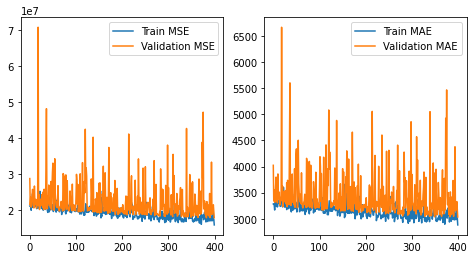

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
hist = history.history

ax[0].plot(hist["loss"], label="Train MSE")
ax[0].plot(hist["val_loss"], label="Validation MSE")
ax[0].legend()

ax[1].plot(hist["mean_absolute_error"], label="Train MAE")
ax[1].plot(hist["val_mean_absolute_error"], label="Validation MAE")
ax[1].legend()

plt.show()

In [24]:
val_history = predictor.evaluate(
    test_ds
)

val_history

126/126 [==============================] - 0s 3ms/step - loss: 21291952.0000 - mean_absolute_error: 3237.1460


[21291952.0, 3237.14599609375]

In [ ]:
predictor.save(
    "saved_model/CarPricePredictor"
)

In [28]:
!zip -r CarPricePredictor.zip saved_model/CarPricePredictor

  adding: saved_model/CarPricePredictor/ (stored 0%)
  adding: saved_model/CarPricePredictor/keras_metadata.pb (deflated 83%)
  adding: saved_model/CarPricePredictor/saved_model.pb (deflated 88%)
  adding: saved_model/CarPricePredictor/variables/ (stored 0%)
  adding: saved_model/CarPricePredictor/variables/variables.data-00000-of-00001 (deflated 32%)
  adding: saved_model/CarPricePredictor/variables/variables.index (deflated 64%)
  adding: saved_model/CarPricePredictor/assets/ (stored 0%)
